In [5]:
import pandas as pd

dataset = pd.read_csv(
    r"C:\Users\Amatek\Downloads\MACHINE LEARNING PROJET S1\ml_final\data\dataset_final.csv",
    index_col=0
)

# Séparation features / cible
X = dataset.drop(columns=["valve_optimal"])
y = dataset["valve_optimal"]

# SPLIT 

X_train = X.iloc[:2000]
y_train = y.iloc[:2000]

X_test = X.iloc[2000:]
y_test = y.iloc[2000:]

# Vérifications
print("X_train :", X_train.shape)
print("y_train :", y_train.shape)
print("X_test  :", X_test.shape)
print("y_test  :", y_test.shape)

print("\nRépartition des classes (train) :")
print(y_train.value_counts())

print("\nRépartition des classes (test) :")
print(y_test.value_counts())

X_train : (2000, 42)
y_train : (2000,)
X_test  : (205, 42)
y_test  : (205,)

Répartition des classes (train) :
valve_optimal
1    1052
0     948
Name: count, dtype: int64

Répartition des classes (test) :
valve_optimal
0    132
1     73
Name: count, dtype: int64


In [6]:
# Correction des NaN
X_train = X_train.fillna(0)
X_test  = X_test.fillna(0)

In [7]:
from sklearn.preprocessing import StandardScaler

# Initialisation
scaler = StandardScaler()

# Fit sur le train
X_train_scaled = scaler.fit_transform(X_train)

# Transform sur le test
X_test_scaled = scaler.transform(X_test)

print("X_train_scaled :", X_train_scaled.shape)
print("X_test_scaled  :", X_test_scaled.shape)

X_train_scaled : (2000, 42)
X_test_scaled  : (205, 42)


In [8]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import joblib

# MODÈLE SVM LINÉAIRE

svm_linear = SVC(
    kernel="linear",
    C=1,
    probability=True,
    random_state=42
)

# Entraînement
svm_linear.fit(X_train_scaled, y_train)


# ÉVALUATION

y_train_pred = svm_linear.predict(X_train_scaled)
y_test_pred  = svm_linear.predict(X_test_scaled)

print("Accuracy TRAIN :", accuracy_score(y_train, y_train_pred))
print("Accuracy TEST  :", accuracy_score(y_test, y_test_pred))

print("\nClassification report (TEST) :")
print(classification_report(y_test, y_test_pred))


# SAUVEGARDE POUR STREAMLIT

joblib.dump(svm_linear, "svm_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(X_train.columns.tolist(), "feature_names.pkl")

print("\n Modèle, scaler et features sauvegardés")


Accuracy TRAIN : 0.9635
Accuracy TEST  : 0.8634146341463415

Classification report (TEST) :
              precision    recall  f1-score   support

           0       1.00      0.79      0.88       132
           1       0.72      1.00      0.84        73

    accuracy                           0.86       205
   macro avg       0.86      0.89      0.86       205
weighted avg       0.90      0.86      0.87       205


 Modèle, scaler et features sauvegardés


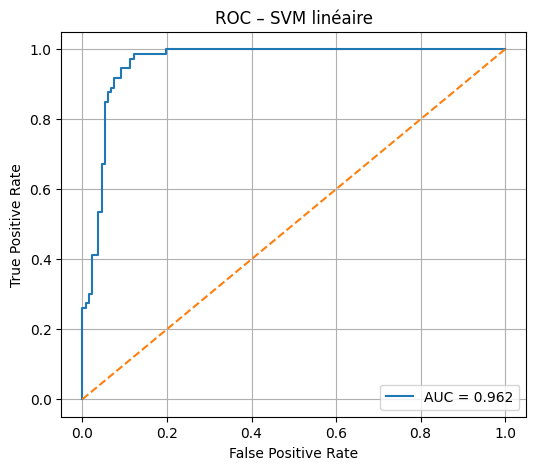

In [9]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_test_proba = svm_linear.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC – SVM linéaire")
plt.legend()
plt.grid(True)
plt.show()


In [10]:
svm_rbf = SVC(
    kernel="rbf",
    C=1,
    gamma="scale",
    probability=True,
    random_state=42
)

svm_rbf.fit(X_train_scaled, y_train)

y_test_pred = svm_rbf.predict(X_test_scaled)

print("Accuracy TEST :", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))


Accuracy TEST : 0.6536585365853659
              precision    recall  f1-score   support

           0       0.81      0.60      0.69       132
           1       0.51      0.75      0.61        73

    accuracy                           0.65       205
   macro avg       0.66      0.68      0.65       205
weighted avg       0.71      0.65      0.66       205

